## Sarima model fitting

This notebook contains the fitting of the sarima model to each series in the dataset, generating an unique object to forecast with all independent models at the same time.

In [1]:
import os
import sys
import pickle
import pandas as pd

src_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(src_path)

from SARIMA.model import MultivariateSARIMA
from DataSimulation.utils import plot_fit

In [2]:
data = pd.read_csv('data.csv', header=None)
data.head()

0    1     2     3     4     5     6      7     8      9   ...   90    91  \
0  6.0  3.0   6.0  95.0   7.0  34.0  63.0  354.0   5.0  152.0  ...  6.0  19.0   
1  6.0  3.0   5.0  83.0   3.0  32.0  63.0  352.0   5.0  150.0  ...  2.0  14.0   
2  5.0  3.0   8.0  83.0   4.0  33.0  71.0  343.0  10.0  152.0  ...  0.0  21.0   
3  8.0  3.0  10.0  98.0   9.0  37.0  66.0  339.0   4.0  167.0  ...  2.0  16.0   
4  6.0  5.0   7.0  85.0  12.0  28.0  61.0  324.0   2.0  169.0  ...  0.0  18.0   

     92     93    94    95    96    97    98   99  
0  23.0  217.0  34.0   9.0   6.0   5.0  24.0  7.0  
1  24.0  215.0  32.0   6.0  10.0  10.0  22.0  8.0  
2  24.0  226.0  36.0   8.0   5.0  10.0  24.0  8.0  
3  18.0  225.0  40.0  10.0   9.0  13.0  21.0  7.0  
4  17.0  208.0  39.0  14.0   6.0  10.0  20.0  9.0  

[5 rows x 100 columns]

In [3]:
data.shape

(200, 100)

In [4]:
test_size = 12
train_data = data.iloc[:-test_size, :].to_numpy()
test_data = data.iloc[-test_size:, :].to_numpy()
print(train_data.shape)
print(test_data.shape)

(188, 100)
(12, 100)


In [5]:
multi_sarima = MultivariateSARIMA(seasonal=True)
multi_sarima.fit(train_data)

c:\Users\User\Python\Environments\tensorflow_3.9\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(8,1,2)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "c:\Users\User\Python\Environments\tensorflow_3.9\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "c:\Users\User\Python\Environments\tensorflow_3.9\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "c:\Users\User\Python\Environments\tensorflow_3.9\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "c:\Users\User\Python\Environments\tensorflow_3.9\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "c:\Users\User\Python\Environments\tensorflow_3.9\lib\site-pack

time: 6m, 12.1s

In [6]:
fitted_values = multi_sarima.fitted_values

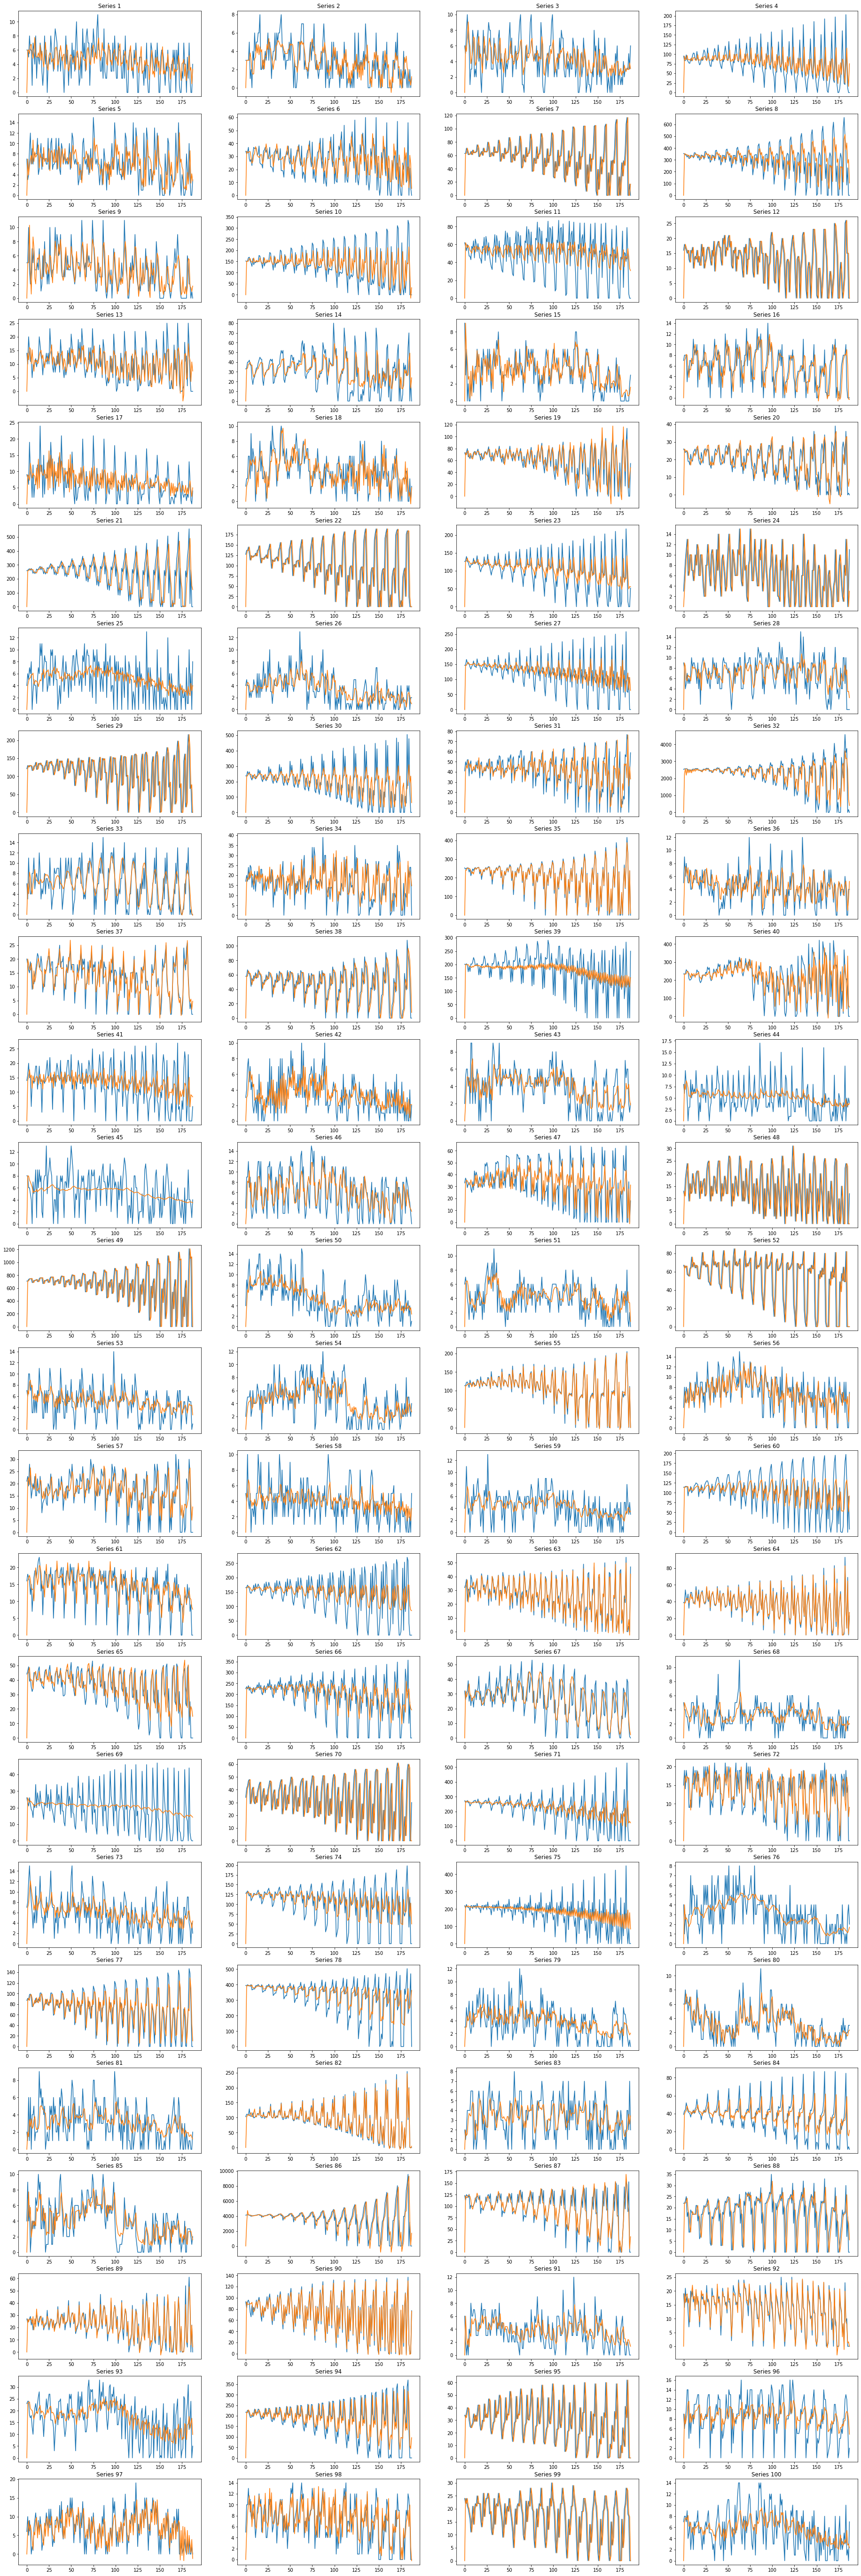

In [7]:
plot_fit(train_data, fitted_values, cols=4)

In [8]:
with open("sarima.pkl", "wb") as file:
    pickle.dump(multi_sarima, file)